# Investigating the Strategy Momentum Factor on Darwins

Could cross sectional Darwin momentum be a predictor of forward Darwin returns? And if so, could we use it to build portfolios of Darwins?

In [1]:
%load_ext autoreload
%autoreload 2
import os, pickle
os.chdir("D:/repos/darwin-API/PYTHON")
from MINIONS.dwx_graphics_helpers import DWX_Graphics_Helpers
from API.InfoAPI.DWX_Info_API import DWX_Info_API as info

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Load pickled Darwin info

In [2]:
quotes = pickle.load(open('../DATA/jn_all_quotes_active_deleted_12062019.pkl', 'rb'))

# Remove non-business days
quotes = quotes[quotes.index.dayofweek < 5]

print(f'Num Darwins: {quotes.shape[1]}') 

print(f'\nDARWIN Symbols: \n{quotes.columns}')

Num Darwins: 5331

DARWIN Symbols: 
Index(['AAB.4.24', 'AAE.4.6', 'AAF.4.13', 'AAJ.4.12', 'AAN.4.2', 'AAO.4.7', 'AAP.4.12', 'AAQ.4.22', 'AAS.4.12', 'AAU.4.23',
       ...
       'ZZG.4.2', 'ZZI.4.4', 'ZZK.4.2', 'ZZL.4.4', 'ZZN.4.1', 'ZZQ.4.5', 'ZZS.4.17', 'ZZV.4.23', 'ZZW.4.11', 'ZZZ.4.22'], dtype='object', length=5331)


## Plot Darwin with most investor capital - GFA 

In [3]:
[col for col in quotes.columns if 'GFA' in col]

['GFA.4.21']

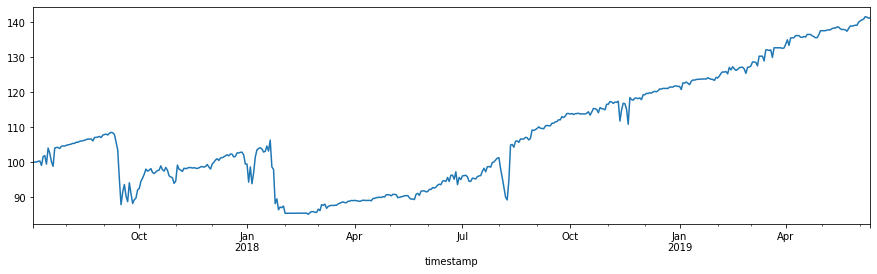

In [4]:
quotes['GFA.4.21'].dropna().plot(figsize=(15,4));

## Create monthly returns

Not much action prior to 2014

In [5]:
quotes = quotes.loc['2014':].resample('M').last()
returns = np.log(quotes) - np.log(quotes.shift(1))

<ipython-input-5-796bb778747f>:2: RuntimeWarning:

invalid value encountered in log



## Calculate matrix of next-period trades

* For each timestamp, calculate returns over some lookback period
* Rank descending 
* Create dataframe indexed by timestamps with columns corresponding to Darwins
* In each row, the top n Darwins get a 1, the rest get a 0

In [9]:
def get_top_n_in_row(row, _n):
    
    top_n = row[list(np.nonzero(row.values)[0])].nlargest(_n)
    _out = pd.Series(data=0, index=row.index)
    
    if len(top_n) == _n and top_n.values.min() > 0:
        _out[list(top_n.index)] = 1
    
    # Default
    return _out
    
def get_top_n_darwins(past_returns, n=20):
    return past_returns.apply(lambda row: get_top_n_in_row(row, n), axis=1)

In [10]:
top_20_darwins = get_top_n_darwins(returns.shift(1), 20)

In [8]:
top_20_darwins.head()

,AAB.4.24,AAE.4.6,AAF.4.13,AAJ.4.12,AAN.4.2,AAO.4.7,AAP.4.12,AAQ.4.22,AAS.4.12,AAU.4.23,AAY.4.5,ABF.4.4,ABH.4.21,ABJ.4.14,ABK.4.19,ABM.4.9,ABN.4.6,ABO.4.1,ABP.4.17,ABT.4.3,ABX.4.21,ACB.4.22,ACE.4.1,ACG.4.7,ACH.4.6,ACM.4.7,ACN.4.6,ACQ.4.1,ACR.4.12,ACS.4.6,ACT.4.5,ACU.4.3,ACW.4.13,ACY.4.17,ACZ.4.7,ADB.4.13,ADD.4.23,ADE.4.22,ADH.4.16,ADJ.4.11,ADK.4.18,ADL.4.20,ADM.4.4,ADO.4.14,ADQ.4.14,ADR.4.16,ADT.4.18,ADU.4.4,ADW.4.7,ADX.4.17,ADY.4.10,ADZ.4.11,AEB.4.4,AEC.4.8,AED.4.20,AEE.4.15,AEF.4.9,AEG.4.18,AEJ.4.6,AEK.4.8,AEM.4.8,AEO.4.16,AEQ.4.23,AER.4.2,AES.4.21,AET.4.17,AEU.4.7,AEV.4.12,AEW.4.21,AEX.4.24,AEY.4.13,AEZ.4.10,AFA.4.5,AFB.4.20,AFD.4.11,AFE.4.11,AFF.4.12,AFH.4.9,AFI.4.1,AFJ.4.21,AFL.4.14,AFM.4.21,AFO.4.12,AFS.4.6,AFT.4.21,AFV.4.7,AFY.4.20,AFZ.4.5,AGA.4.12,AGB.4.5,AGC.4.5,AGD.4.9,AGE.4.1,AGF.4.22,AGG.4.10,AGH.4.21,AGI.4.17,AGK.4.5,AGM.4.9,AGR.4.6,AGW.4.22,AGY.4.6,AHB.4.10,AHE.4.22,AHF.4.17,AHH.4.3,AHI.4.2,AHK.4.18,AHL.4.22,AHM.4.12,AHU.4.3,AIA.4.4,AIB.4.19,AIC.4.20,AIE.4.14,AIF.4.4,AIH.4.12,AII.4.13,AIJ.4.9,AIL.4.12,AIM.4.11,AIO.4.6,AIU.4.9,AIW.4.9,AIX.4.6,AIY.4.15,AJB.4.11,AJD.4.23,AJE.4.11,AJF.4.17,AJG.4.21,AJH.4.21,AJJ.4.12,AJM.4.22,AJN.4.19,AJO.4.19,AJQ.4.16,AJY.4.7,AKA.4.9,AKB.4.11,AKC.4.7,AKD.4.2,AKI.4.4,AKK.4.17,AKL.4.18,AKO.4.5,AKP.4.11,AKQ.4.2,AKS.4.1,AKY.4.10,AKZ.4.15,ALB.4.1,ALC.4.17,ALD.4.24,ALE.4.23,ALH.4.17,ALL.4.23,ALM.4.18,ALN.4.3,ALO.4.1,ALP.4.20,ALR.4.20,ALX.4.1,ALY.4.17,AMA.4.19,AMB.4.13,AMC.4.15,AMD.4.16,AMF.4.10,AMH.4.1,AMI.4.7,AMK.4.24,AMN.4.15,AMP.4.15,AMR.4.5,AMT.4.11,AMU.4.23,AMV.4.17,ANB.4.10,ANC.4.12,AND.4.10,ANF.4.18,ANG.4.7,ANH.4.18,ANI.4.6,ANP.4.18,ANQ.4.6,ANS.4.9,ANW.4.6,AOC.4.14,AOD.4.6,AOE.4.10,AOF.4.19,AOI.4.17,AOJ.4.12,AOK.4.1,AOL.4.22,AOO.4.23,AOQ.4.11,AOR.4.10,AOT.4.9,AOV.4.8,AOW.4.22,APE.4.20,APF.4.4,APG.4.10,APH.4.16,API.4.5,APK.4.23,APN.4.10,APO.4.22,APR.4.10,APW.4.9,APX.4.3,APY.4.19,APZ.4.6,AQA.4.11,AQC.4.21,AQF.4.11,AQG.4.24,AQK.4.24,AQL.4.12,AQN.4.3,AQP.4.24,AQQ.4.24,AQU.4.9,AQV.4.12,AQY.4.6,AQZ.4.16,ARD.4.20,ARE.4.4,ARG.4.2,ARI.4.18,ARJ.4.9,ARL.4.1,ARN.4.6,ARP.4.13,ARQ.4.15,ARS.4.2,ARU.4.13,ARV.4.5,ARW.4.15,ARY.4.23,ASB.4.9,ASC.4.23,ASF.4.13,ASH.4.21,ASO.4.2,ASR.4.18,AST.4.11,...,YEP.4.7,YET.4.2,YEX.4.10,YEZ.4.24,YFX.4.23,YFY.4.16,YGA.4.4,YGU.4.5,YGV.4.10,YHN.4.3,YHQ.4.23,YIA.4.9,YIB.4.18,YIC.4.10,YIE.4.11,YIF.4.17,YIQ.4.24,YIX.4.16,YJA.4.17,YJB.4.16,YJG.4.9,YJI.4.14,YJN.4.7,YJW.4.13,YJX.4.8,YKP.4.16,YKS.4.1,YLA.4.22,YLG.4.15,YLO.4.24,YLQ.4.17,YLR.4.20,YLW.4.7,YMA.4.10,YMG.4.10,YMK.4.6,YMV.4.21,YNF.4.14,YOC.4.17,YOE.4.5,YOH.4.6,YOI.4.14,YOO.4.11,YOS.4.7,YQA.4.6,YQK.4.6,YQV.4.10,YRM.4.7,YRY.4.16,YSA.4.15,YSJ.4.20,YSK.4.5,YST.4.12,YTC.4.17,YTJ.4.14,YTK.4.1,YTM.4.13,YTN.4.11,YTX.4.10,YTY.4.10,YTZ.4.8,YUE.4.21,YUM.4.5,YVG.4.1,YVJ.4.21,YVX.4.18,YWB.4.22,YWC.4.20,YWI.4.22,YWO.4.23,YWR.4.19,YXF.4.10,YXJ.4.16,YXP.4.6,YYB.4.12,YYC.4.8,YYD.4.19,YYJ.4.5,YYL.4.22,YYT.4.2,YYU.4.5,YYW.4.7,YYZ.4.6,YZD.4.16,YZF.4.16,YZM.4.15,YZU.4.17,YZX.4.24,YZY.4.7,YZZ.4.20,ZAA.4.3,ZAB.4.22,ZAC.4.20,ZAD.4.11,ZAK.4.8,ZAT.4.17,ZAX.4.9,ZAZ.4.2,ZBQ.4.9,ZBS.4.17,ZBX.4.16,ZCW.4.4,ZCX.4.17,ZDD.4.17,ZDV.4.18,ZEB.4.8,ZEE.4.8,ZEO.4.10,ZES.4.6,ZEW.4.22,ZEX.4.13,ZFM.4.6,ZFR.4.15,ZFS.4.13,ZFV.4.13,ZFX.4.10,ZGC.4.7,ZGE.4.15,ZGK.4.18,ZGO.4.16,ZGZ.4.16,ZHE.4.8,ZHM.4.11,ZHQ.4.23,ZHX.4.17,ZIA.4.19,ZIB.4.23,ZIL.4.7,ZIX.4.20,ZIZ.4.2,ZJP.4.12,ZJT.4.16,ZJZ.4.12,ZKS.4.6,ZKZ.4.8,ZLA.4.13,ZLC.4.24,ZLO.4.22,ZLX.4.24,ZLZ.4.6,ZMA.4.3,ZMG.4.19,ZMI.4.21,ZML.4.15,ZMP.4.22,ZNC.4.12,ZNH.4.16,ZNI.4.14,ZNJ.4.18,ZNK.4.21,ZNS.4.22,ZNX.4.16,ZNY.4.8,ZOA.4.10,ZOB.4.13,ZOC.4.11,ZOD.4.7,ZOE.4.10,ZOJ.4.6,ZOR.4.9,ZOT.4.1,ZOW.4.16,ZOX.4.2,ZOZ.4.17,ZPC.4.11,ZPF.4.21,ZPI.4.3,ZPS.4.1,ZQM.4.5,ZQP.4.15,ZQY.4.6,ZRB.4.22,ZRC.4.3,ZRL.4.11,ZRQ.4.8,ZRX.4.21,ZRZ.4.9,ZSJ.4.15,ZSM.4.20,ZSO.4.8,ZSQ.4.23,ZSV.4.17,ZTE.4.22,ZTG.4.9,ZTS.4.20,ZTT.4.4,ZTY.4.13,ZUF.4.8,ZUK.4.10,ZUM.4.17,ZUN.4.14,ZUO.4.13,ZUP.4.9,ZUS.4.24,ZUV.4.11,ZUZ.4.18,ZVF.4.16,ZVI.4.4,ZVN.4.6,ZVQ.4.5,ZVU.4.20,ZVZ.4.4,ZWA.4.24,ZWB.4.20,ZWC.4.24,ZWM.4.21,ZWP.4.9,ZWS.4.6,ZWT.4.19,ZWU.4.5,ZWW.4.23,ZXB.4.1,ZXD.4.1

## Vectorised backtest
* Multiply top n matrix by forward returns

In [11]:
def calculate_strategy_returns(top_darwins_df, future_returns_df, n=20):
    return top_darwins_df * (future_returns_df) / n

In [12]:
strategy_returns = calculate_strategy_returns(top_20_darwins, returns.shift(-1), n=20)

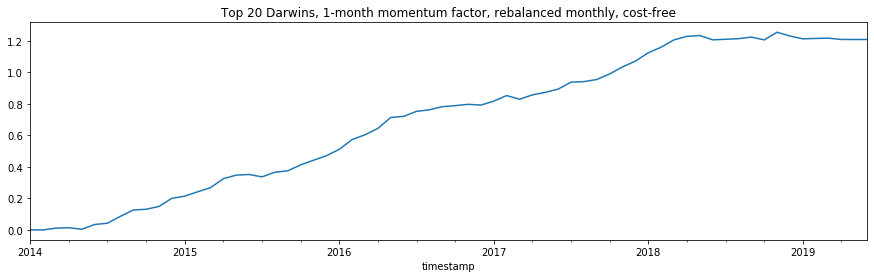

In [13]:
strategy_returns.sum(axis=1).cumsum().plot(title='Top 20 Darwins, 1-month momentum factor, rebalanced monthly, cost-free',
                                          figsize=(15,4));

## Do several backtests over parameter space

<ipython-input-14-9be12a3e773c>:6: RuntimeWarning:

invalid value encountered in log

<ipython-input-14-9be12a3e773c>:6: RuntimeWarning:

invalid value encountered in log

<ipython-input-14-9be12a3e773c>:6: RuntimeWarning:

invalid value encountered in log

<ipython-input-14-9be12a3e773c>:6: RuntimeWarning:

invalid value encountered in log

<ipython-input-14-9be12a3e773c>:6: RuntimeWarning:

invalid value encountered in log

<ipython-input-14-9be12a3e773c>:6: RuntimeWarning:

invalid value encountered in log

<ipython-input-14-9be12a3e773c>:6: RuntimeWarning:

invalid value encountered in log

<ipython-input-14-9be12a3e773c>:6: RuntimeWarning:

invalid value encountered in log

<ipython-input-14-9be12a3e773c>:6: RuntimeWarning:

invalid value encountered in log

<ipython-input-14-9be12a3e773c>:6: RuntimeWarning:

invalid value encountered in log

<ipython-input-14-9be12a3e773c>:6: RuntimeWarning:

invalid value encountered in log

<ipython-input-14-9be12a3e773c>:6: RuntimeWarning:

in

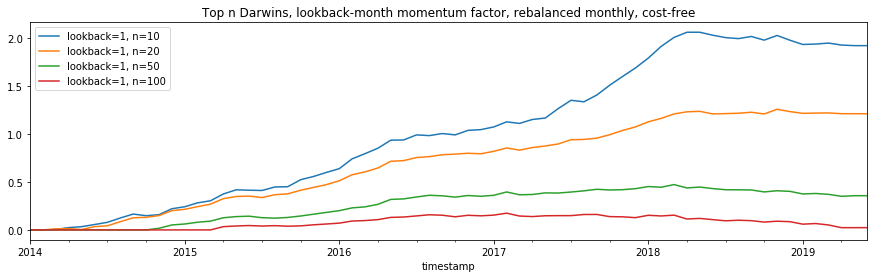

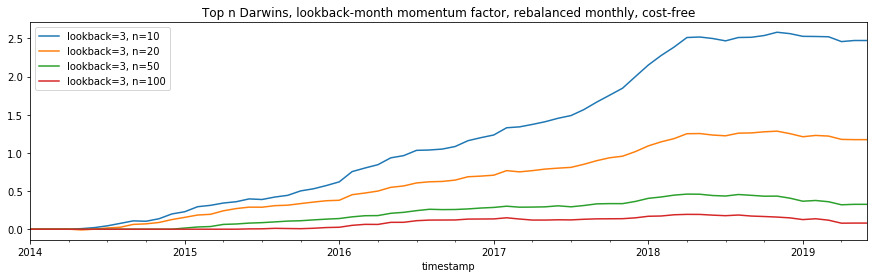

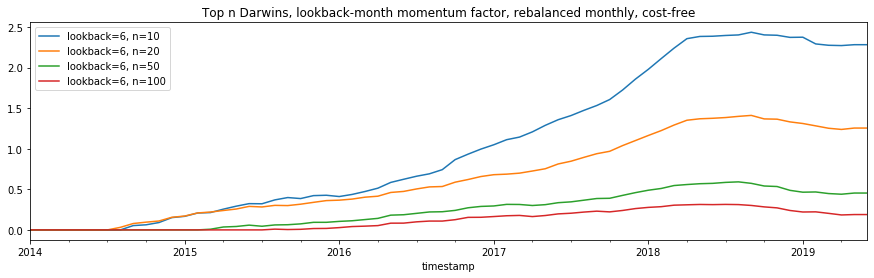

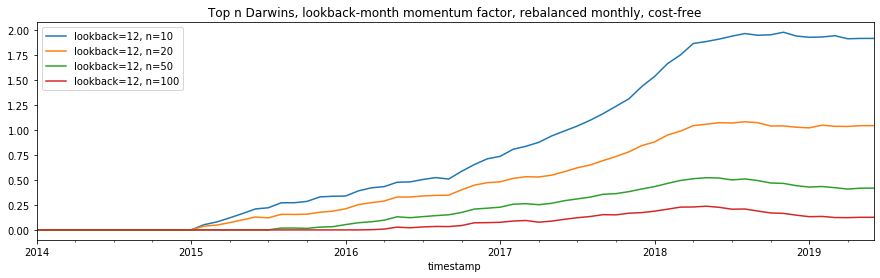

In [14]:
lookbacks = [1, 3, 6, 12]
ns = [10, 20, 50, 100]
for lookback in lookbacks:
    plt.figure()
    for n in ns:
        momo_factor = np.log(quotes) - np.log(quotes.shift(lookback))
        top_n_darwins = get_top_n_darwins(momo_factor.shift(1), n)
        strat_returns = calculate_strategy_returns(top_n_darwins, returns.shift(-1), n=n)
        strat_returns.sum(axis=1).cumsum().plot(title=f'Top n Darwins, lookback-month momentum factor, rebalanced monthly, cost-free',
                                                figsize=(15,4),
                                                label=f'lookback={lookback}, n={n}')
        plt.legend();

## What can we say about these results?
* A strategy of trading cross-sectional momentum on Darwin returns would have done well up until 2018 (before costs - and noting that this is a very surprising result and that we have not validated the performance data provided by the DARWIN API)
* The performance up to 2018 is *surprisingly good* - not what I would have expected from a group of active retail FX traders!
* Interestingly, targeting a smaller number of better performing strategies would have outperformed
* This provides a measure of confidence in the strategy momentum factor as a predictor of forward performance
* Something changed in 2018 - this needs further work, but this looks to coincide with an increase in FX volatility
* While we haven't added costs to these backtests, transaction costs are *at least partially* accounted for in the calculation of Darwin quotes
* Divergence due to slippage and latency is **not** accounted for
* Investors pay a 20% performance fee on Darwins - this is also **not** accounte for here. 

## Assignment

One thing that *might* explain the outstanding performance of DARWIN momentum up to 2018 *could be* imported history that hasn't been verified on the Darwinex platform (traders can import history from MT4 accounts held elsewhere).  

This is just a hypothesis - but we can explore it using the API.  

If you look at the data returned by `_Get_DARWIN_Universe_`, you can see that there are two columns relating to account migration and verification. Both these columns represent Unix time in milliseconds, so to convert it to a regular `datetime` object, you have to do `datetime.datetime.fromtimestamp(1492503732732/1000)` on the column to create timestamps that you can work with.  

There's an example of this in the first DARWIN notebook.  

But once you've got that data, can you explore how represented unverified trading histories are in the DARWINS selected by the momentum factor for trading? 

Share your results in the `#14_darwins` channel.